<a href="https://colab.research.google.com/github/dinans2003d/dinan-s_portfolio/blob/main/Data_Science_compensation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#How do experience level, work type (remote vs. on-site), and geographical location collectively influence the salaries of data science professionals?

In [ ]:
import pandas as pd

salaries = pd.read_csv('/content/ds_salaries.csv')

In [ ]:
print(salaries.head())

   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US

#Data Cleaning

### Checking for missing values

In [ ]:
print("Missing values in each column:\n", salaries.isnull().sum())

Missing values in each column:
 work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


### Make all the column names to a consistent lowercase and replace with underscores

In [ ]:
salaries.columns = salaries.columns.str.lower().str.replace(' ', '_')

### Ensure consistency in categorical columns
### Convert 'experience_level' and 'remote_ratio' to uppercase for consistency

In [ ]:
salaries['experience_level'] = salaries['experience_level'].str.upper()
salaries['remote_ratio'] = salaries['remote_ratio'].astype(str)

### Remove duplicate (if any)

In [ ]:
salaries = salaries.drop_duplicates()

### Preview Cleaned Data Set

In [ ]:
print(salaries.head())

   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence remote_ratio  \
0   80000             EUR          85847                 ES          100   
1   30000             USD          30000                 US          100   
2   25500             USD          25500                 US          100   
3  175000             USD         175000                 CA          100   
4  120000             USD         120000                 CA          100   

  company_location company_size  
0               ES            L  
1               US      

#Exploratory Data Analysis (EDA)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Analyzing experience level impact on salary

In [ ]:
experience_salary = salaries.groupby('experience_level')['salary_in_usd'].mean().reset_index()

### Plotting experience level vs salary


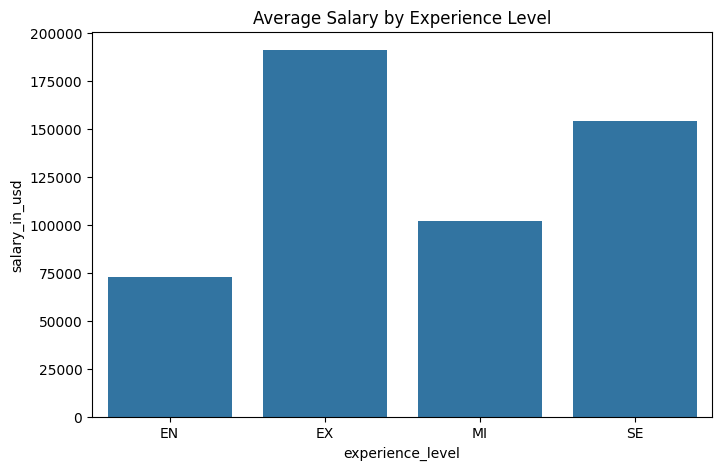

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=experience_salary, x='experience_level', y='salary_in_usd')
plt.title('Average Salary by Experience Level')
plt.show()

## Analyzing Remote work impact on Salary

In [ ]:
remote_salary = salaries.groupby('remote_ratio')['salary_in_usd'].mean().reset_index()

###Plotting remote ratio vs salary

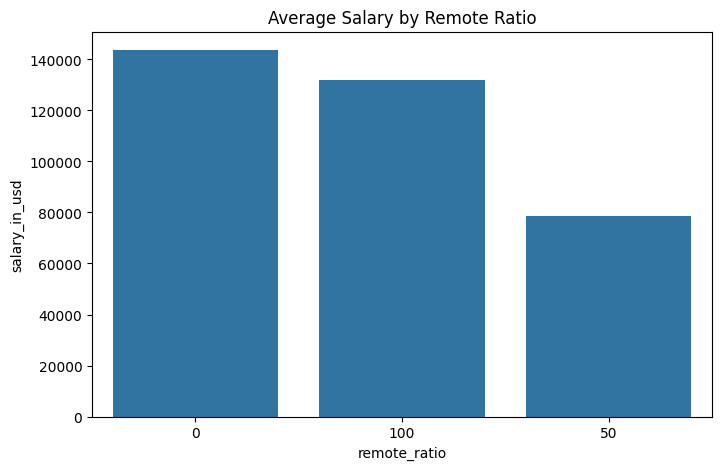

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=remote_salary, x='remote_ratio', y='salary_in_usd')
plt.title('Average Salary by Remote Ratio')
plt.show()

##Analyzing geographical impact on salary

In [ ]:
top_locations = salaries['company_location'].value_counts().nlargest(10).index
geo_salary = salaries[salaries['company_location'].isin(top_locations)]
geo_salary_avg = geo_salary.groupby('company_location')['salary_in_usd'].mean().reset_index()

### Plotting company location vs salary

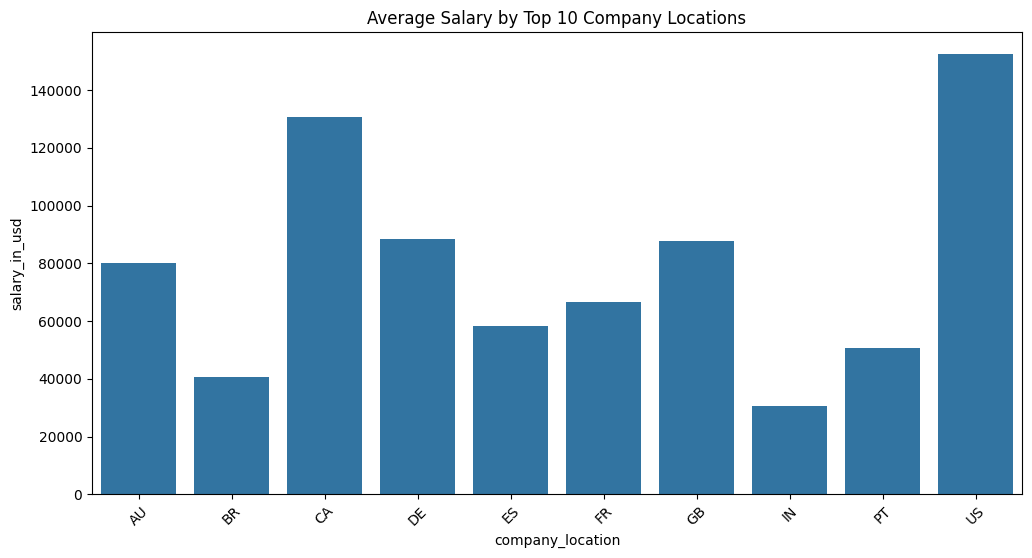

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=geo_salary_avg, x='company_location', y='salary_in_usd')
plt.xticks(rotation=45)
plt.title('Average Salary by Top 10 Company Locations')
plt.show()

##Combined Analysis: Experience Level, Remote Work, and Location

### Combined analysis: Average salary by experience level and remote ratio for top 5 locations


In [ ]:
combined_salaries = salaries.groupby(['company_location', 'experience_level', 'remote_ratio'])['salary_in_usd'].mean().reset_index()


####Filter for top 5 locations for a cleaner visualization


In [ ]:
top_combined_locations = combined_salaries['company_location'].value_counts().nlargest(5).index
combined_salaries = combined_salaries[combined_salaries['company_location'].isin(top_combined_locations)]

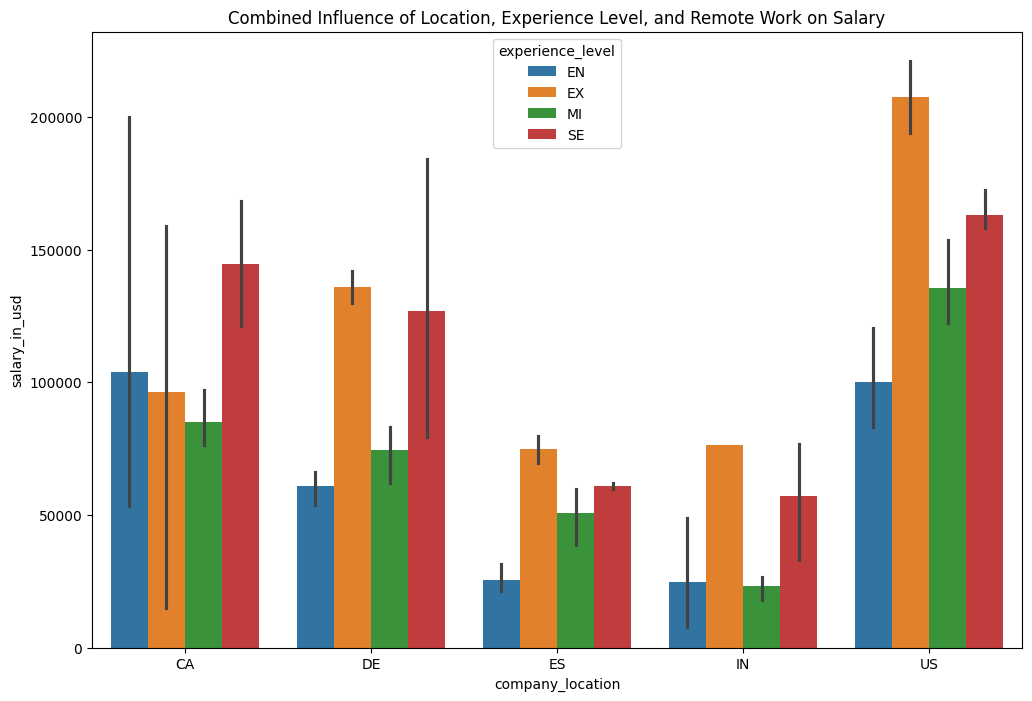

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=combined_salaries, x='company_location', y='salary_in_usd', hue='experience_level')
plt.title('Combined Influence of Location, Experience Level, and Remote Work on Salary')
plt.show()

In [ ]:
!jupyter nbconvert --to html /content/MISSA_APPLICATIN.ipynb

[NbConvertApp] Converting notebook /content/MISSA_APPLICATIN.ipynb to html
[NbConvertApp] Writing 751430 bytes to /content/MISSA_APPLICATIN.html
